# May's Taste Preliminary Youtube Video Statistics - May 26, 2022

The purpose of this notebook is to use the preliminary data (view_count per vid, like_count per vid, and comment_count per vid) to help make an informed determination on the focus of analysis. To begin, a whisker plot will be constructed based on views to determine if there are potential outliers and get an overview of the quartiles. 

### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns
import warnings


### Adjusting Columns

In [59]:
df = pd.read_csv('mays_taste_yt.csv', parse_dates=['upload_date'], index_col='upload_date')

#removing the preexisting index_col
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.columns



Index(['video_id', 'video_title', 'view_count', 'like_count', 'comment_count'], dtype='object')

### View_Count Statistics

In [61]:
df['view_count'].describe()

count       134.000000
mean       3053.671642
std       10898.915993
min         101.000000
25%         483.500000
50%         838.500000
75%        1286.750000
max      102552.000000
Name: view_count, dtype: float64

##### Comments:
The description indicates that the data does not follow a normal distribution but rather a right skewed distribution due to the mean of 3054 being greater than the median of 839 rounded to the nearest whole number. This is due to the presents of multiple outliers (suggested by the standard deviation of 10999 rounded to the nearest whole number) and thus interquartile ranges are a better option in analysis. 

For the following charts the median will be used as a baseline for comparisons sake. However, the outliers, given that the data is completely accurate, will be kept and researched as to why those particular videos received a signficantly larger reception than the majority of videos. 

### Whisker Plot of View_Count

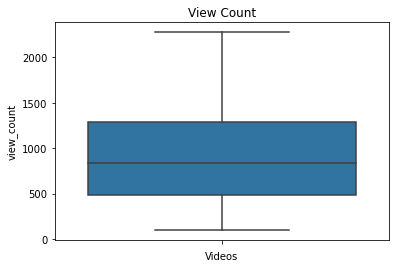

In [65]:
y = df['view_count']
w_plot=sns.boxplot(y=y, showfliers=False)
plt.title('View Count')
plt.xlabel('Videos')
plt.show()

##### Comments:
The box plot above was constructed with showfliers off, which means that the outliers are part of the construction of the box plot, but are not present on the graph because it makes the graph unreadable. The reason why outliers were not removed from the data set is because there are a significant amount of them, which may indicate in this specific case some pattern that may have lead to those outlier videos to be more successful that the vast majority. 

### Average View Count per Video Upload Date in Each Month within Each Year


In [10]:
df1 = df.copy()
df1['month'] = df1.index.strftime('%B')
categories = ['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November',
        'December'  
        ]

#to order the months chronologically
df1['month'] = pd.Categorical(df1.month, categories=categories, ordered=True)
df1['year'] = df1.index.year

#gets the mean views based on month uploaded
df_mean = df1.groupby(['year', 'month'], sort=False)['view_count'].mean()
df_mean = df_mean.unstack('month')

#gets the number of uploaded videos for that month
df_vid = df1.groupby(['year', 'month'], sort=False)['view_count'].count()
df_vid = df_vid.unstack('month')

#gets the mean views based on month uploaded per video
df_bar = df_mean.div(df_vid)

df_bar

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2020,NaN,NaN,NaN,NaN,94.75,1430.333333,71.468750,96.527778,467.666667,177.472222,2915.638889,238.983471
2021,951.333333,115.875,323.22449,476.472222,163.25,328.777778,281.333333,531.250000,770.080000,162.640000,450.440000,404.500000
2022,541.687500,304.500,181.24000,209.777778,108.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


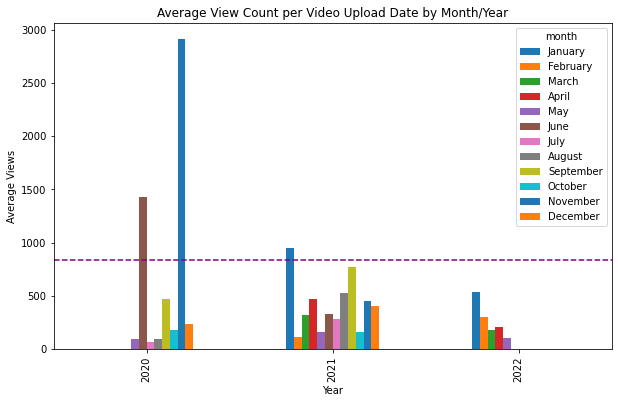

In [55]:
v_plt=df_bar.plot.bar(figsize=(10,6), ylabel='Average Views', xlabel='Year')

plt.title('Average View Count per Video Upload Date by Month/Year')

# add median to graph
median=df['view_count'].median()
v_plt.axhline(median, color='purple', linestyle='--')


plt.show()

The above graph was constructed to give a general overview of the relationship between upload date month and total views. Ideally, with all variables controlled for (such as content), there should be a positive relationship between the later a date is uploaded to the total amount of views it accrues. In this case, it is not (although there is some semblence of that relationship in 2022). With the depicted little to no relationship, there must be other factors affecting or significantly affecting the viewership. Possible factors may include video content, duration, video quality or film technique, and engagement. Of course each of these factors may in conjunction with month uploaded affect the overall viewship, and this matter will be explored more deeply when the major factors are determined. 

Additionally, there are other factors that are difficult to measure that will not be addressed in this analysis, such as the accessibility of the videos to the masses that is determined by the youtube algorithim. 



### Like_Count Statistics

In [95]:
df['like_count'].describe()

count    134.000000
mean      84.044776
std      123.865004
min        8.000000
25%       48.000000
50%       62.500000
75%       77.000000
max      994.000000
Name: like_count, dtype: float64

### Whiskerplot of Like_Count

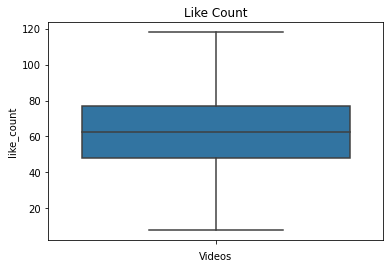

In [100]:
sns.boxplot(y=df['like_count'], showfliers=False)
plt.title('Like Count')
plt.xlabel('Videos')
plt.show()

### Average View/Like Ratio per Video Upload Date in Each Month within Each Year

In [96]:
# using the previous dataframe that accounted for the month and the year

# reusing the df_bar that determined the average views per video and creating a new variable to store the average likes and comments
df_likes = df1.groupby(['month', 'year'], sort=False)['like_count'].mean()

df_li_vi = df_mean.unstack().div(df_likes)
df_li_vi.describe()

count    25.000000
mean     26.602784
std      17.729047
min       4.418367
25%      14.043011
50%      23.534545
75%      34.934827
max      84.037630
dtype: float64

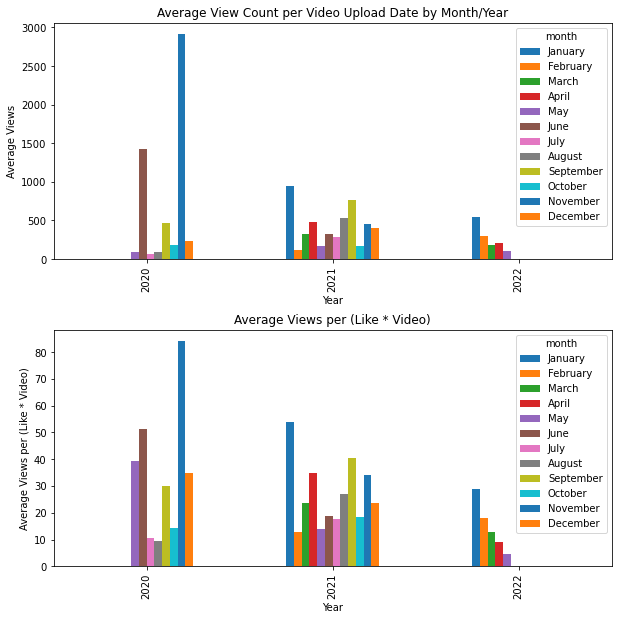

In [93]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
# previous graph
ax1=df_bar.plot.bar(figsize=(10,10), ax=ax1,ylabel='Average Views', xlabel='Year')
ax1.title.set_text('Average View Count per Video Upload Date by Month/Year')


# current graph
ax2=df_li_vi.unstack(level=0).plot.bar(figsize=(10,10), ax=ax2, ylabel='Average Views per (Like * Video)', xlabel='Year')
ax2.title.set_text('Average Views per (Like * Video)')

# adjust spacing between subplots
plt.subplots_adjust(hspace=.3)

plt.show()

##### Comments:
This graph is to be used in conjunction to the above graph to facilitate the deterimination of potential factors to investigate in the matter of viewer engagement. In this case, generally (with the exception of May 2020 and December 2020), the lower the average view count the higher the likes per view or in this case the lower the view per likes. This indicates that there may be a small group of loyal viewers who consistently engage with the videos. 

It may be beneficial to explore the data concerning percentage of subscribers that engage to see if the sizable majority that are interacting with the video are indeed loyal followers and strategize ways to increase non-loyal engagement. 

### Next Steps
Given there are 134 videos, it would be reasonable to proceed in looking for commonalities within particular set groups of videos and compare them with the other groups. For this analysis, there will be three groups that will be compared to one another in each of two characteristic groups. The first characteristic group will be based on viewship and the second will be based on likes. As far as the set of groups is concerned, there will be three for each characterstic group. The set groups will be determined based on characteristic group as follows: top 10, middle 10, and bottom 10.

The purpose of this is to make relatively quick inferences between groups that will be further evaluationed and dive into a more comprehensive set of video characteristics such as monetization patterns, subscriber engagement, and etc. 

### View_Count Group

In [131]:
df2=df.copy()
df2=df2.sort_values('view_count', ascending=False)

# top 10
view_top10=df2.iloc[0:10]
view_top10_names=view_top10['video_title']

# middle 10
view_middle10=df2.iloc[62:72]
view_middle10_names=view_middle10['video_title']

# bottom 10
view_bottom10=df2.iloc[-10:]
view_bottom10_names=view_bottom10['video_title']

view_order=f"Top 10:\n{view_top10_names}\n\nMiddle 10:\n{view_middle10_names}\n\nBottom 10:\n{view_bottom10_names}"
print(view_order)

Top 10:
upload_date
2020-11-07               宁夏清炖羊肉（家庭版）汤汁鲜美、羊肉软烂、无膻味诀窍 Stewed Lamb
2021-01-25    烤紅豆年糕, 高颜值外表酥脆香甜软糯的年糕，只要三个步骤，小白也不会失败的配方 Baked ...
2020-06-10    芝麻椒盐酥餅,（芝麻椒盐酥皮月饼），两招教会你做各种各样的酥皮类甜点，初学者一看就会 Cri...
2020-12-11          甜菜这样做最好吃，没有土腥味，大人小孩都喜歡吃的美味烤甜菜 Roasted Beets
2021-09-18    自制腌咸鸡蛋，无需白酒也能腌出100%的个个翻沙流油的咸鸡蛋，方法超级简单，只需三个步骤，一...
2020-09-07    网红人气零食——红枣夹核桃仁，不用去买，自己动手做更放心、更好吃，做法非常简单一看就会 ｜J...
2021-04-12    用这三招就可以判断黑枸杞的真假 Three ways to distinguish real...
2021-01-03    香蕉煎着吃更美味，10 分钟的健康早餐香煎香蕉片，一大盘吃不夠 | Pan Fried Ci...
2021-04-03                   Best Homemade Spring Rolls 春卷的改进做法
2021-03-05    小米粥最养胃、最好喝的做法，胃酸过多连喝一周就好了，小米和水的比例，用冷水还是热水煮粥？哪个...
Name: video_title, dtype: object

Middle 10:
upload_date
2022-03-19    French Toast in 5 minutes | French Toast for B...
2021-09-08    Limelight Hydrangea 1 Year After 去年九月第一次种绣球花今年...
2021-07-12                    简简单单的夏日开胃小菜｜涼拌酸辣萝卜丝 ｜Radish Salad
2021-10-08    南瓜发面葱油饼Pumpkin Scallion Pancake Step By Step |...
2021-10-11    Crispy and Te

### Like_Count Group

In [138]:
df3=df.copy()
df3=df3.sort_values('like_count', ascending=False)

# top 10
like_top10=df3.iloc[:10]
like_top10_names=like_top10['video_title']

# middle 10
like_middle10=df3.iloc[62:72]
like_middle10_names=like_middle10['video_title']

# bottom 10
like_bottom10=df3.iloc[-10:]
like_bottom10_names=like_bottom10['video_title']

like_order=f"Top 10:\n{like_top10_names}\n\nMiddle 10:\n{like_middle10_names}\n\nBottom 10:\n{like_bottom10_names}"
print(like_order)



Top 10:
upload_date
2020-11-07               宁夏清炖羊肉（家庭版）汤汁鲜美、羊肉软烂、无膻味诀窍 Stewed Lamb
2021-01-25    烤紅豆年糕, 高颜值外表酥脆香甜软糯的年糕，只要三个步骤，小白也不会失败的配方 Baked ...
2020-06-10    芝麻椒盐酥餅,（芝麻椒盐酥皮月饼），两招教会你做各种各样的酥皮类甜点，初学者一看就会 Cri...
2021-09-18    自制腌咸鸡蛋，无需白酒也能腌出100%的个个翻沙流油的咸鸡蛋，方法超级简单，只需三个步骤，一...
2020-12-11          甜菜这样做最好吃，没有土腥味，大人小孩都喜歡吃的美味烤甜菜 Roasted Beets
2020-09-07    网红人气零食——红枣夹核桃仁，不用去买，自己动手做更放心、更好吃，做法非常简单一看就会 ｜J...
2020-06-18    Tiramisu Easy Recipe｜How to make an eggless Ti...
2021-03-05    小米粥最养胃、最好喝的做法，胃酸过多连喝一周就好了，小米和水的比例，用冷水还是热水煮粥？哪个...
2020-12-08        一碗驱寒羊肉面吃到流汗，暖胃又暖身，宁夏臊子面的家常做法｜Lamb Noodle Soup
2021-03-19    韭葱怎样做最好吃？韭葱配五花肉香气四溢 味道绝佳，超级下饭菜，五分钟搞定 | Leek wi...
Name: video_title, dtype: object

Middle 10:
upload_date
2020-12-02            DIY: Christmas Decoration Vase | 圣诞节玻璃瓶装饰
2021-02-03    Roasted Chickpea Treats for Dog 自制狗狗训练健康小零食——烤...
2021-12-02    酸汤水饺，如何做酸汤水饺的酸汤How to Make Sour Soup Dumplings...
2021-04-04           我的部分美食菜谱合辑 Some of my Chinese food recipes
2021-11-08    非洲紫罗兰摘片叶子插在土里

### Conclusion:
Now that the list of videos have been obtained, the next notebook will follow up on this.